In [3]:
import pandas as pd

# Load dataset
df = pd.read_csv(r"C:\Users\HP\Downloads\Mall.csv.csv")

# Display initial rows
print(df.head())

# Drop CustomerID if not useful for clustering
df = df.drop(['CustomerID'], axis=1)

# Encode Gender column (Male=0, Female=1)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Check for missing values
print(df.isnull().sum())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [4]:
from sklearn.preprocessing import StandardScaler

# Feature Selection for Clustering
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


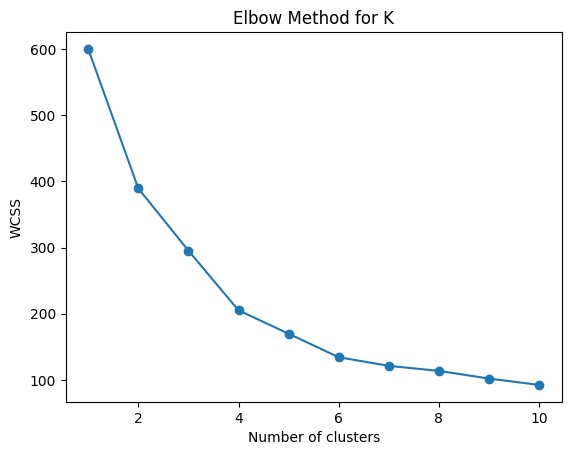

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Use Elbow Method to find optimal k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot Elbow
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Apply KMeans with optimal k (say k=5)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(scaled_features)

# Add cluster column
df['KMeans_Cluster'] = y_kmeans


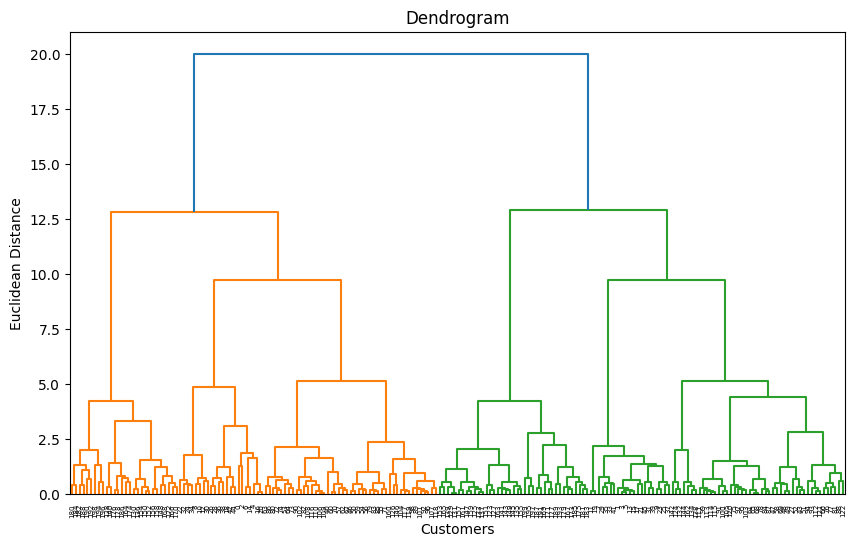

In [9]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()


In [12]:
from sklearn.cluster import KMeans

# Apply KMeans Clustering
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)  # This line creates 'kmeans_labels'

# Add labels to dataframe if you want
df['KMeans_Cluster'] = kmeans_labels


In [13]:
from sklearn.metrics import silhouette_score

score_kmeans = silhouette_score(X_scaled, kmeans_labels)
score_hc = silhouette_score(X_scaled, hc_labels)

print(f"Silhouette Score (KMeans): {score_kmeans:.2f}")
print(f"Silhouette Score (Hierarchical): {score_hc:.2f}")


Silhouette Score (KMeans): 0.41
Silhouette Score (Hierarchical): 0.39
